<div align="center">
    <h1>Atividade final - Caio Sousa Mendes </h1>
    <h3>ENGC63 - T01 - Processamento Digital de Sinais </h3>
    <h4>Prof.: Antônio C. L. Fernandes Júnior</h4>
</div>



O método escolhido foi da <b>transformação bilinear </b> para projetar a partir de um filtro <b> passa-baixa Butterworth </b> de sexta ordem, um filtro discreto passa-baixa com frequência de corte (-3dB) igual ωc = 2π/3.


<font size=5><b> 1. Filtro Butterworth passa-baixa</b>  </font>  

O filtro Butterworth é um filtro de tempo contínuo que pode ser implementado em tempo discreto, ou seja, de sistemas analógicos para digitais. Para a implementação em sistemas digitais, existem métodos para realizar essa transformação do tempo contínuo para o discreto.

A função da magnitude quadrática para um filtro passa-baixa de Butterworthd e tempo contínuo tem a forma:

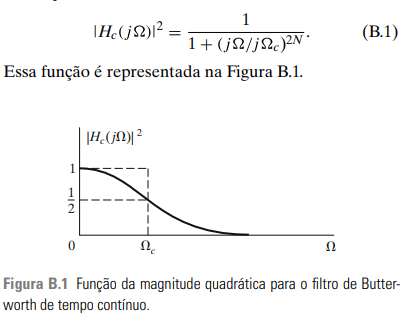

<div align="center"><font size=2> <b>Figura 1:</b> Fórmula da função magnitude quadrática. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

Com a variação da ordem do filtro (N), as atenuações após a frequência de corte são mais abruptas, podemos observar na figura abaixo:

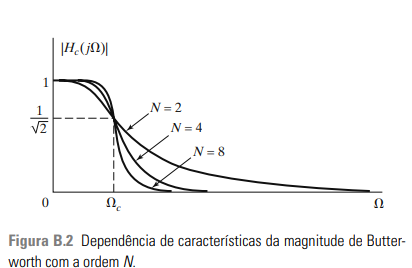

<div align="center"><font size=2> <b>Figura 2:</b> Gráfico da função magnitude com a variação da ordem N. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

<br>
 
<font size=5><b>2. Transformação Bilinear</b> </font>  

Esse método é uma transformação algébrica entre as variáveis s e z, que mapeia todo o eixo j no plano s em uma volta na circunferência unitária no plano z. Ocorre também o mapeamento de $ −∞ ≤ \Omega ≤ ∞ $ para $ −π ≤ ω $
≤ π com as fórmulas expressas abaixo:

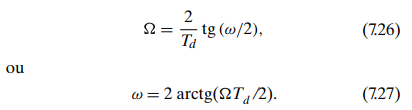

<div align="center"><font size=2> <b>Figura 3:</b> Fórmulas da transformação bilinear para a frequência. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

Com isso, a transformação entre as variáveis de frequência de tempo contínuo e tempo discreto são pré-deformadas nas frequências de tempo contínuo correspondentes com a <b>figura 3 </b>, de modo que a distorção de frequência inerente na transformação bilinear mapeará as frequências de tempo contínuo de volta para as frequências críticas de tempo discreto corretas.

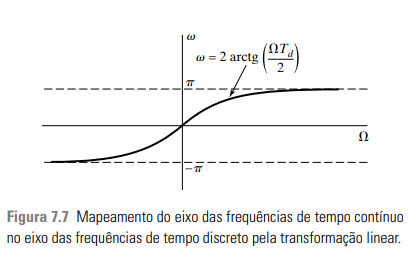

<div align="center"><font size=2> <b>Figura 4:</b> Gráfico do mapeamento da frequência. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

<br>
 
<font size=5><b>3. Implementação</b> </font>  

Para implementação digital desse filtro vamos utilizar o python como linguagem e também para plotar os gráficos necessários para a análise do filtro.

Vamos implementar em dois formatos: na forma <b> direta </b> e na forma sob <b>cascata de 2º ordem </b>.

Esses dois formatos serão comparados quanto a sensibilidade à quantização de parâmetros ao truncar dos coeficientes calculados, assim diminuindo a precisão do filtro. 

<b> Especificações do filtro: </b>

$ ordem $ = 6 

$ td = 1 $ (Período de amostragem por conveniência)

$ wDiscreto = \frac{2\pi}{3}$ (Frequência de corte tempo discreto)

$ wAnalogico = \frac{2 . tg(w/2)}{td}  $ (Frequência de corte mapeado a partir da <b>figura 3</b>)

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy import signal  
import math 
ordem = 6
td = 1
wDiscreto = (2*np.pi)/3
wAnalogico = (2*np.tan(wDiscreto / 2)) / td

<br>
 
<font size=4><b>3.2 Construção do filtro na forma direta sem truncamento</b> </font>  

In [3]:
b, a = signal.butter(ordem, wAnalogico, 'lowpass', True) 

In [4]:
numerador, denominador = signal.bilinear(b, a)  

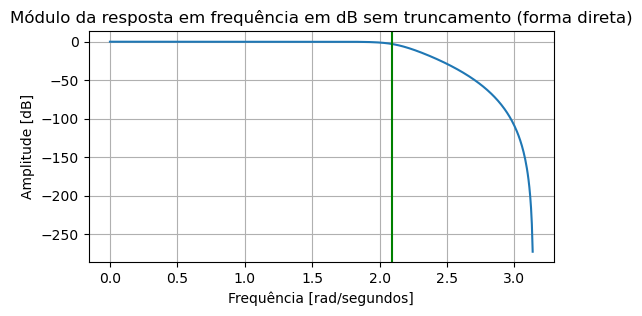

In [5]:
w, h = signal.freqz(numerador, denominador)

plt.figure(figsize=(6, 3))

plt.plot(w, 20*np.log10(abs(h))) 
plt.title('Módulo da resposta em frequência em dB sem truncamento (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.axvline(wDiscreto, color='green')
plt.show() 

<br>
 
<font size=4><b>3.3 Construção do filtro na forma direta com truncamento para 5 casas decimais</b> </font>  

Foi utilizado a função <b> truncate </b> para truncar os coeficientes com $ n $ casas decimais.

In [6]:
def truncate(num,n): 

    temp = str(num)
    for x in range(len(temp)):
        if temp[x] == ".":
            try:
                return float(temp[: x + n + 1])
            except:
                return float(temp)
    return float(temp)


In [7]:
numeradorT5 = []
denominadorT5 = []

for i in range(0, len(numerador)):
    numeradorT5.append(truncate(numerador[i],5))

for i in range(0, len(denominador)):
    denominadorT5.append(truncate(denominador[i],5))

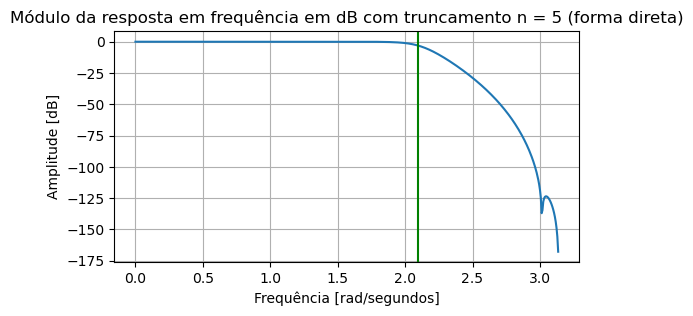

In [8]:
wT5, hT5 = signal.freqz(numeradorT5, denominadorT5)

plt.figure(figsize=(6, 3))
plt.plot(wT5, 20*np.log10(abs(hT5))) 
plt.title('Módulo da resposta em frequência em dB com truncamento n = 5 (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.axvline(wDiscreto, color='green')
plt.show() 

<br>
 
<font size=4><b>3.4 Construção do filtro na forma direta com truncamento para 2 casas decimais</b> </font>  

In [9]:
numeradorT2 = []
denominadorT2 = []

for i in range(0, len(numerador)):
    numeradorT2.append(truncate(numerador[i],2))


for i in range(0, len(denominador)):
    denominadorT2.append(truncate(denominador[i],2))

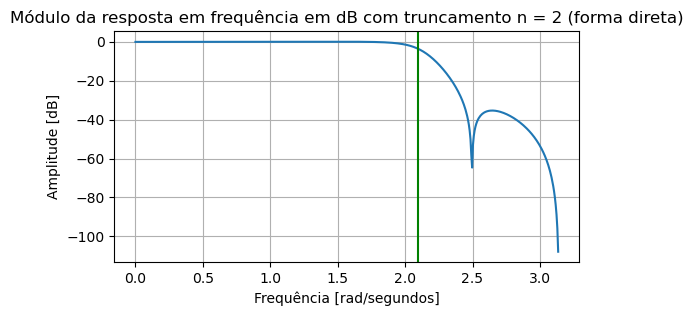

In [10]:
wT2, hT2 = signal.freqz(numeradorT2, denominadorT2)

plt.figure(figsize=(6, 3))
plt.plot(wT2, 20*np.log10(abs(hT2))) 
plt.title('Módulo da resposta em frequência em dB com truncamento n = 2 (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.axvline(wDiscreto, color='green')
plt.show() 

<br>
 
<font size=4><b>3.5 Construção do filtro na forma sob cascata sem truncamento</b> </font>  

Foi utilizado a função <b> signal.tf2sos </b> para converter o numerador e o denominador em três blocos de segunda ordem. 

In [11]:
x = signal.tf2sos(numerador,denominador)

print("Primeira bloco de 2º ordem: ", x[0])
print("Segunda bloco de 2º ordem: ", x[1])
print("Terceira bloco de 2º ordem: ", x[2])

Primeira bloco de 2º ordem:  [0.11638344 0.23324552 0.11686406 1.         0.54450919 0.08901837]
Segunda bloco de 2º ordem:  [1.         2.00001857 1.00000158 1.         0.6202041  0.24040821]
Terceira bloco de 2º ordem:  [1.         1.99586877 0.99588572 1.         0.81689745 0.63379489]


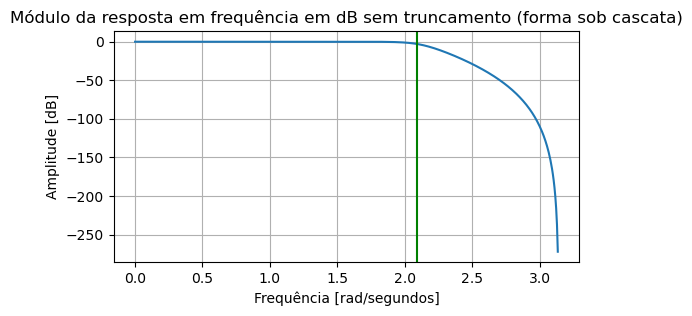

In [12]:
wC, hC = signal.sosfreqz(x)

plt.figure(figsize=(6, 3))
plt.plot(wC, 20*np.log10(abs(hC))) 
plt.title('Módulo da resposta em frequência em dB sem truncamento (forma sob cascata)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.axvline(wDiscreto, color='green')
plt.show() 

<br>
 
<font size=4><b>3.6 Construção do filtro na forma sob cascata com truncamento para 5 casas decimais</b> </font>  

Para realizarmos o truncamento dos coeficientes em três blocos de 2º ordem armazenados em <b>x</b>, foi necessário utilizar a função <b> np.vectorize </b> para aplicar a função <b> truncate </b> a cada elemento da variável do tipo <b> numpy.ndarray </b>.

In [13]:
print(type(x))

<class 'numpy.ndarray'>


In [14]:
truncar = np.vectorize(truncate)

In [15]:
xT5 = truncar(x,5)

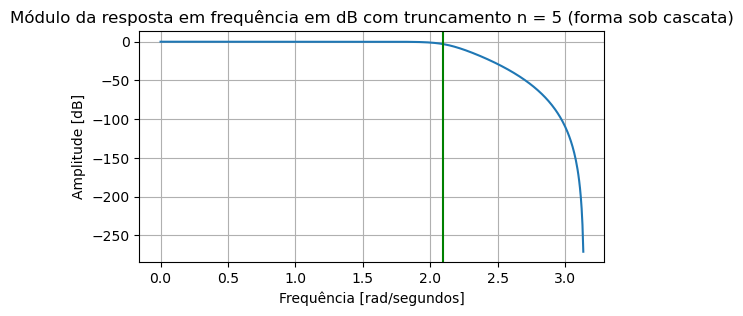

In [16]:
w5, h5 = signal.sosfreqz(xT5)
plt.figure(figsize=(6, 3))
plt.plot(w5, 20*np.log10(abs(h5))) 
plt.title('Módulo da resposta em frequência em dB com truncamento n = 5 (forma sob cascata)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.axvline(wDiscreto, color='green')
plt.show() 

<br>
 
<font size=4><b>3.7 Construção do filtro na forma sob cascata com truncamento para 2 casas decimais</b> </font>  

In [17]:
xT2 = truncar(x,2)

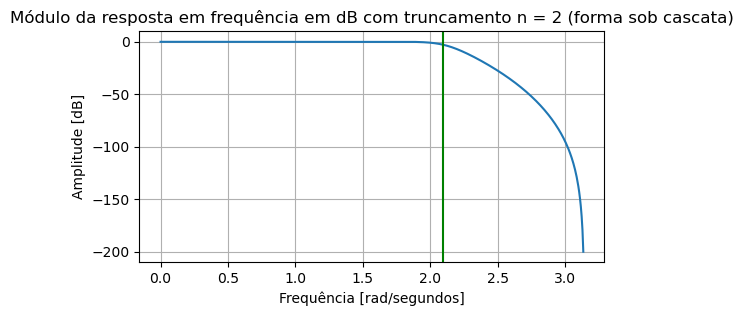

In [18]:

w2, h2 = signal.sosfreqz(xT2)

plt.figure(figsize=(6, 3))
plt.plot(w2, 20*np.log10(abs(h2))) 
plt.title('Módulo da resposta em frequência em dB com truncamento n = 2 (forma sob cascata)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.axvline(wDiscreto, color='green')
plt.show() 

<br>
 
<font size=4><b>3.8 Comparação da resposta em frequência na forma direta</b> </font>  

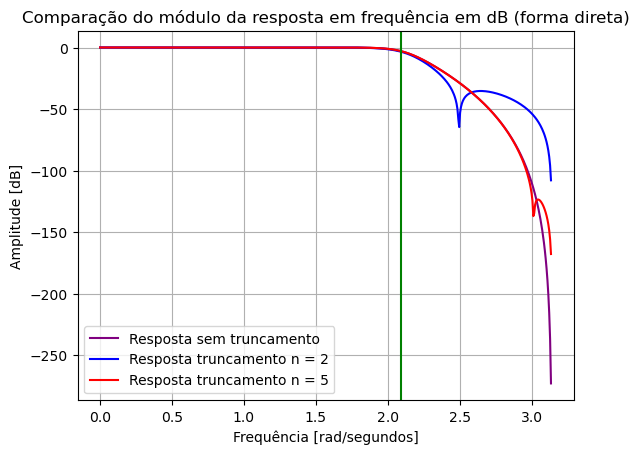

In [19]:
plt.plot(w, 20*np.log10(abs(h)), label='Resposta sem truncamento', color = 'purple')
plt.plot(wT2, 20*np.log10(abs(hT2)), label='Resposta truncamento n = 2', color = 'b')
plt.plot(wT5, 20*np.log10(abs(hT5)), label='Resposta truncamento n = 5', color = 'r')
plt.title('Comparação do módulo da resposta em frequência em dB (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.legend(loc="lower left")
plt.grid(True)
plt.axvline(wDiscreto, color='green')

Podemos observar que o truncamento ocasionou alteração na atenuação da magnitude, principalmente nas frequências mais altas. Para a curva com truncamento de 5 casas decimais, houve uma distorção na magnitude menor em relação a distorção ocorrido com o truncamento de 2 casas decimais.

Podemos concluir que a implementação desse filtro na forma direta é altamente sensível a pertubações dos coeficientes.

<br>
 
<font size=4><b>3.9 Comparação da resposta em frequência na forma sob cascata</b> </font>  

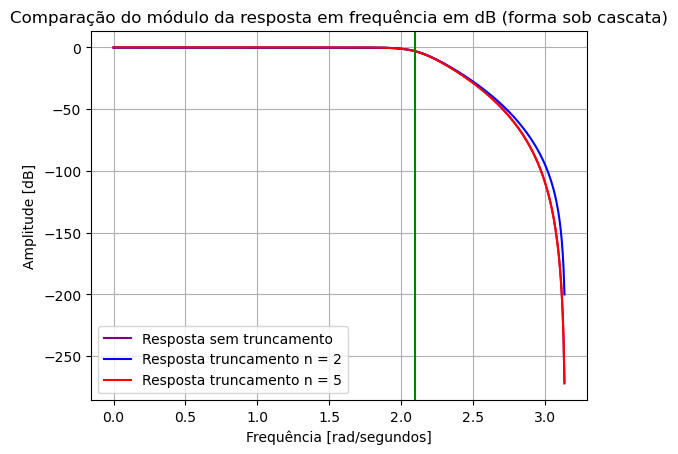

In [20]:
plt.plot(wC, 20*np.log10(abs(hC)), label='Resposta sem truncamento', color = 'purple')
plt.plot(w2, 20*np.log10(abs(h2)), label='Resposta truncamento n = 2', color = 'b')
plt.plot(w5, 20*np.log10(abs(h5)), label='Resposta truncamento n = 5', color = 'r')
plt.title('Comparação do módulo da resposta em frequência em dB (forma sob cascata)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.legend(loc="lower left")
plt.grid(True)
plt.axvline(wDiscreto, color='green')

Podemos observar que o truncamento também ocasionou alteração na atenuação da magnitude, principalmente nas frequências mais altas. Porém, não houve distorções em magnitude nas altas frequências. No gráfico, a curva da resposta sem truncamento e com truncamento de 5 casas decimais estão bem próximas, ou seja, o truncamento nessa especificação se aproximou bem do filtro com precisão "infinita" (sem truncamento). Para a curva com truncamento de 2 casas decimais, ocorreu uma diferença na atenuação da magnitude em relação as duas outras respostas.

A razão para que a forma direta ser mais sensível ao erro em comparação a forma sob cascata é causado pelo fato de que cada uma das raízes dos polinômios é afetada por todos os erros dos coeficientes do polinômio, pois cada raiz é uma função de todos os coeficientes do polinômio. Já na forma sob cascata, o erro dos coeficientes afetam bem menos os fatores de segunda ordem, pois um par determinado de polos é independente aos demais.

<br>
 
<font size=5><b>4. Transformações</b> </font>  

<b>Fórmulas gerais das transformações a partir do filtro Butterworth passa-baixa: </b>

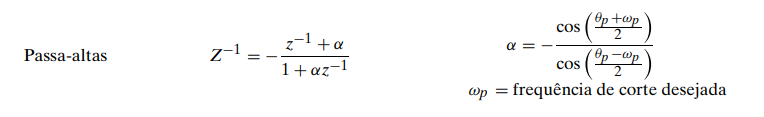

<div align="center"><font size=2> <b>Figura 5:</b> Fórmula da transformação de filtro digital passa-baixas de frequência de corte $θp $ para passa-alta. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

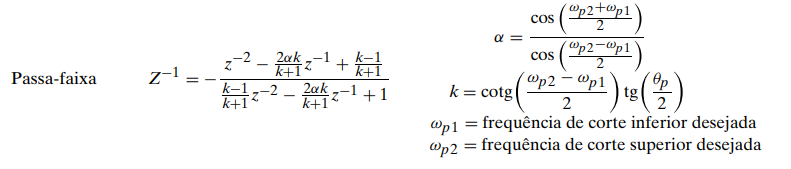

<div align="center"><font size=2> <b>Figura 6:</b> Fórmula da transformação de filtro digital passa-baixas de frequência de corte $θp $ para passa-faixa. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

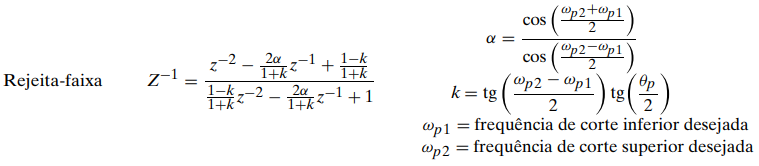

<div align="center"><font size=2> <b>Figura 7:</b> Fórmula da transformação de filtro digital passa-baixas de frequência de corte $θp $ para rejeita-faixa. Retirada de Oppenheim, A. V. Processamento de Sinais de Tempo Discreto. 3. ed. São Paulo: Pearson, 2013. </font></div>

Foram realizadas três transformações na forma direta para analisar o módulo da resposta em frequência de cada um:

$ Z^{-1} = {-z}^{-1} $ (Transformar para filtro passa-alta)

$ Z^{-1} = {z}^{-2} $ (Transformar para filtro rejeita-faixa)

$ Z^{-1} = -{z}^{-2} $ (Transformar para filtro passa-faixa)


Essas transformações são casos particulares para essas condições:
<ul>
passa-alta: $\alpha = 0$

rejeita-faixa: $\alpha = 0$ e $ k = 1$

passa-faixa: $\alpha = 0$ e $ k = 1$
</ul>

<b>Vamos mostrar um exemplo para o passa-alta para que $\alpha = 0$:</b>


Para a transformação $ Z^{-1} = {-z}^{-1} $, precisamos achar o $w_p $ para que $\alpha = 0$

Frequência de corte do filtro passa-baixa de origem: $θp =\frac{2\pi}{3}$

Substituindo na formula da <b> figura 5 </b>, temos:

$ \alpha = \Large - \frac{cos(\frac{2\pi}{6} + \frac{w_p}{2})}{cos(\frac{2\pi}{6} - \frac{w_p}{2})}$ (1)

Para que $\alpha = 0$, precisamos achar o valor em que o cosseno do numerador seja igual a 0, ou seja, $ \large cos(\frac{\pi}{2})$:

$ \large {\frac{2\pi}{6} + \frac{w_p}{2} = \frac{\pi}{2} }$ (2)

Resolvendo a equação (2), achamos $ \large w_p = \frac{\pi}{3}$

Agora substituindo na equação (1) o valor de  $ \large w_p = \frac{\pi}{3}$:

$ \alpha = \Large - \frac{cos(\frac{2\pi}{6} + \frac{\pi}{6})}{cos(\frac{2\pi}{6} - \frac{\pi}{6})}$ $\implies$ 
$ \alpha = \Large - \frac{cos(\frac{3\pi}{6})}{cos(\frac{\pi}{6})}$  $\implies$ $ \alpha = \Large - \frac{cos(\frac{\pi}{2})}{cos(\frac{\pi}{6})}$ $\implies$ $ \alpha = \Large - \frac{0}{cos(\frac{\pi}{6})}$  $\implies$ $ \alpha =  0 $

Com isso, realizar essa transformação $ Z^{-1} = {-z}^{-1} $ é necessário apenas ter o conhecimento da frequência de corte do filtro passa-baixa, pois matematicamente é encontrado o $w_p$ que satisfaz a condição quando $\alpha = 0$.


Para as transformações para passa-faixa e rejeita-faixa é utilizado o mesmo raciocínio matemático, apenas modificando a frequência $w_p$ para $w_{p1}$ e $w_{p2}$ e o acréscimo do termo $k$.



<br>
 
<font size=4><b>4.1 Transformação passa-alta $ Z^{-1} = {-z}^{-1} $ </b> </font>  


In [90]:
numerador1 = []
denominador1 = []


for i in range(0,len(numerador)):

    numerador1.append(numerador[i] * (-1) ** i)  
    denominador1.append(denominador[i] * (-1) ** i)  
                   


C:\Users\caios\AppData\Local\Temp\ipykernel_15304\2251439903.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w4, 20*np.log10(abs(h4)))


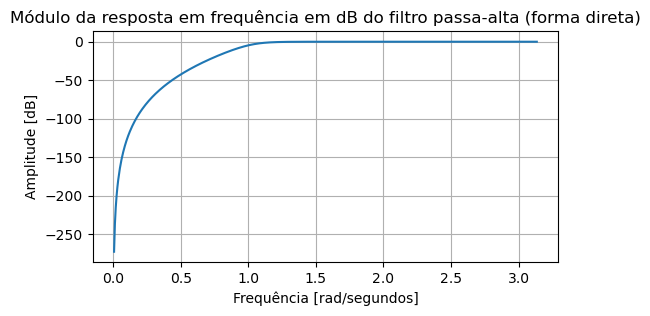

In [91]:
w4, h4 = signal.freqz(numerador1, denominador1)

plt.figure(figsize=(6, 3))
plt.plot(w4, 20*np.log10(abs(h4))) 
plt.title('Módulo da resposta em frequência em dB do filtro passa-alta (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.show() 

<br>
 
<font size=4><b>4.2 Transformação passa-faixa $ Z^{-1} = {-z}^{-2} $ </b> </font>  


In [82]:
numerador2 = []
denominador2 = []

for i in range(0,len(numerador)):
    
    numerador2.insert((2*i) + 1 , 0) 
    numerador2.insert((2*i) ,numerador[i] * (-1) ** i)  
    
    denominador2.insert((2*i)  , denominador[i] * (-1) ** i)  
    denominador2.insert((2*i) + 1 , 0) 

C:\Users\caios\AppData\Local\Temp\ipykernel_15304\683060247.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w5, 20*np.log10(abs(h5)))


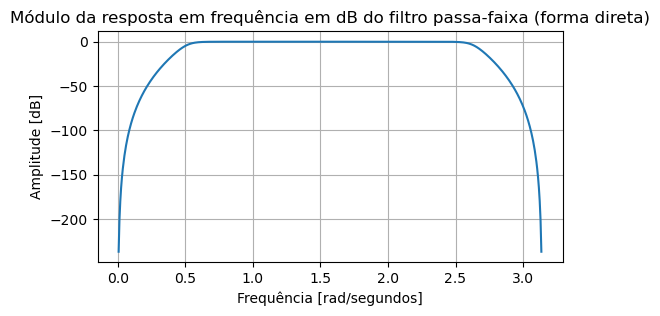

In [89]:
w5, h5 = signal.freqz(numerador2, denominador2)

plt.figure(figsize=(6, 3))
plt.plot(w5, 20*np.log10(abs(h5))) 
plt.title('Módulo da resposta em frequência em dB do filtro passa-faixa (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.show() 

<br>
 
<font size=4><b>4.3 Transformação rejeita-faixa $ Z^{-1} = {z}^{-2} $ </b> </font>  


In [85]:
numerador3 = []
denominador3 = []

for i in range(0,len(numerador)):
    
    numerador3.insert((2*i) + 1 , 0) 
    numerador3.insert((2*i) ,numerador[i])  
    
    denominador3.insert((2*i)  , denominador[i])  
    denominador3.insert((2*i) + 1 , 0) 

C:\Users\caios\AppData\Local\Temp\ipykernel_15304\3446343871.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w6, 20*np.log10(abs(h6)))


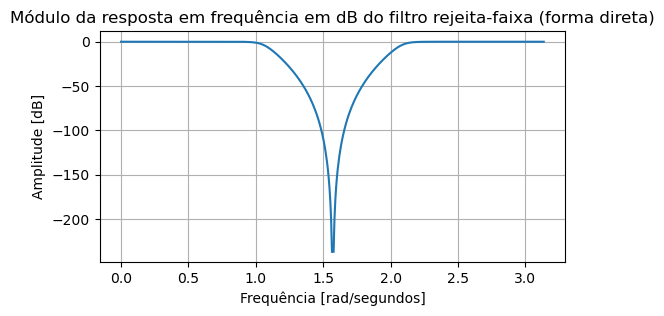

In [87]:
w6, h6 = signal.freqz(numerador3, denominador3)

plt.figure(figsize=(6, 3))
plt.plot(w6, 20*np.log10(abs(h6))) 
plt.title('Módulo da resposta em frequência em dB do filtro rejeita-faixa (forma direta)') 
plt.xlabel('Frequência [rad/segundos]') 
plt.ylabel('Amplitude [dB]') 
plt.grid(which='both', axis='both') 
plt.show() 

Essas são as respostas em frequência em dB a partir do filtro Butterworth para cada respectiva transformação e com as especificações particulares.

<br>
 
<font size=5><b>5. Conclusão</b> </font> 

A partir dos experimentos realizados, conseguimos mostrar os efeitos negativos nos filtros quando é realizado o truncamento dos coeficientes. Quando o truncamento foi realizado na forma direta, distorções e perda na atenuações da magnitude foram bem superiores em comparação na implementação na forma sob cascata, o que condiz com a literatura. Com isso, concluímos que a forma direta é altamente sensível a pertubações nos coeficientes e a forma sob cascata é bem menos sensível. Além disso, os filtros resultantes das transformações a partir do filtro passa-baixa Butterworth também estão de acordo com o que achamos na literatura.